In [56]:
#import math
import numpy as np
#grandezze SI
h= 6.626*10**-34 #Plank
e=1.6*10**-19    #Carica
n=1              #indice rifrazione Re
c=3*10**8/n      #light speed

R=0.3            #distanza fotodiodo
Pl=10*10**-3     #LASER power
lmb=632.8*10**-9 #lunghezza d'onda
D=50*10**-6      #dimensioni particella
df=150*10**-6    #diametro focalizzazione
omega=1/50       #angolo solido sotteso da detector
#Rload=10**4      #resistenza di carico

sigma=2*(np.pi*(D/2)**2) #Sez d'urto 2*sez geometrica
Af=np.pi*(df/2)**2       #Area di focalizzazione
I=Pl/Af                  #intensità sul campione
Egamma=h*c/lmb           #Energia singolo fotone

#Irayl=I*(1+math.cos(theta)**2)/(2*R**2)*(2*math.pi/lmb)**4*((n-1)/(n**2+2))**2*(D/2)**6
P=I*sigma*omega/(4*np.pi)*2

re=P/Egamma/2
print('Power  =', P, 'W')
#print(re)
#print('Current=', re*e, 'A')
#print('Voltage=', re*e*Rload, 'V')
print('primo nero:   theta=', np.arcsin(3.83/np.pi*lmb/D))
print('secondo nero: theta=', np.arcsin(7.02/np.pi*lmb/D))

Power  = 7.073553026306459e-06 W
primo nero:   theta= 0.015429881845493595
secondo nero: theta= 0.028284051032425525


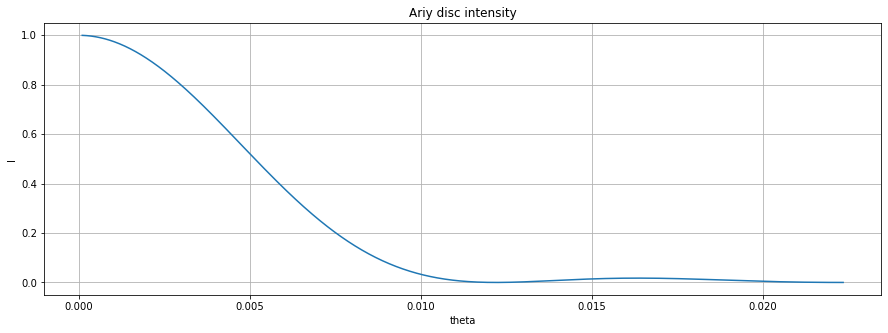

In [60]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt
#prova funz bessel e disco*sin
l_d=0.01
ka =np.pi/l_d
y=[]
x=np.linspace(0.0001,np.arcsin(7.02/np.pi*l_d), 1000) #in zero mi da un warning ma no problem
for t in x:
    y.append( (2*sc.jv(1,ka*np.sin(t))/ka/np.sin(t) )**2 )
#    y.append( (2*sc.jv(1,ka*np.sin(t))/ka/np.sqrt(np.sin(t)) )**2 )

plt.figure(figsize=(15,5))
plt.plot(x, y)
plt.xlabel('theta')
plt.ylabel('I')
plt.title('Ariy disc intensity')
#plt.legend()
plt.grid(True)

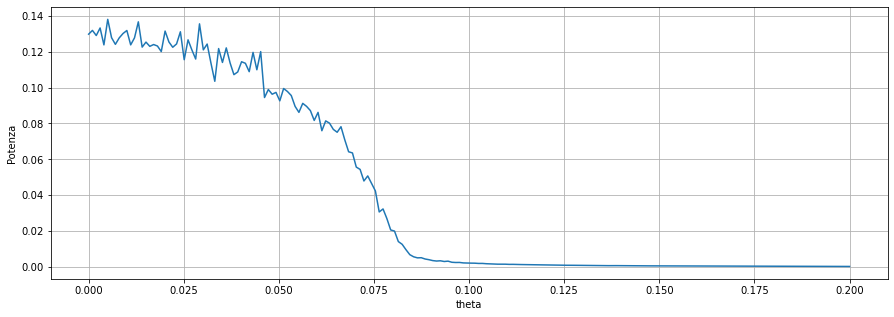

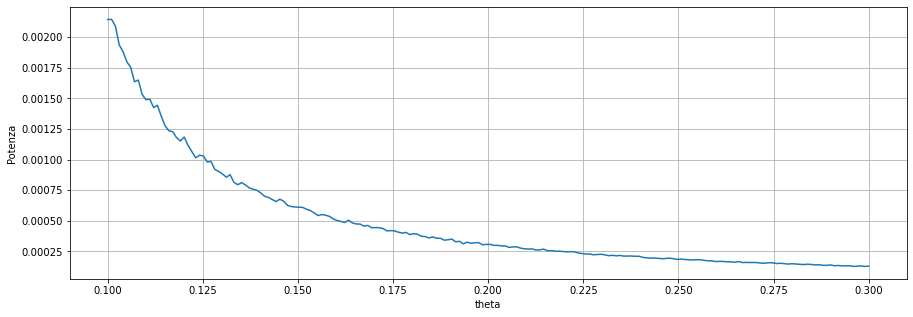

In [31]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt

k=2*np.pi/lmb
alfa_cone=2*np.arccos(1-omega/2/np.pi)
r_plan=R*np.sin(alfa_cone/2)
M=3000

def f(t,t0):
    return sc.jv(1,k*D*np.sin(t))**2 * np.arcsin(np.sqrt(r_plan**2/R**2 - np.sin(t-t0)**2)) /abs(np.sin(t))

theta0=np.linspace(0,np.arcsin(7.02/np.pi*l_d), 500)
result=[]
#error=[]
for th0 in theta0:
    accum =0
    accum2=0
    for i in range(M):
        theta=np.random.uniform(th0-np.arcsin(r_plan/R), th0+np.arcsin(r_plan/R))
        accum += f(theta,th0)
        accum2+= f(theta,th0)**2
    result.append(2*I* (2*R/k/D)**2 * 2*np.arcsin(r_plan/R) * accum/M)
#    error.append( np.sqrt(accum2/M - (accum/M)**2) )
#    print(result[-1])
#    print(error[-1])

plt.figure(figsize=(15,5))
plt.plot(theta0, result)
#plt.errorbar(theta0, result, yerr=error)
plt.xlabel('theta')
plt.ylabel('Potenza')
#plt.title('a')
#plt.legend()
plt.grid(True)

theta0=np.linspace(0.1,0.3, 200)
result=[]
#error=[]
for th0 in theta0:
    accum =0
    accum2=0
    for i in range(M):
        theta=np.random.uniform(th0-np.arcsin(r_plan/R), th0+np.arcsin(r_plan/R))
        accum += f(theta,th0)
        accum2+= f(theta,th0)**2
    result.append(2*I* (2*R/k/D)**2 * 2*np.arcsin(r_plan/R) * accum/M)
#    error.append( np.sqrt(accum2/M - (accum/M)**2) )
#    print(result[-1])
#    print(error[-1])

plt.figure(figsize=(15,5))
plt.plot(theta0, result)
#plt.errorbar(theta0, result, yerr=error)
plt.xlabel('theta')
plt.ylabel('Potenza')
#plt.title('a')
#plt.legend()
plt.grid(True)

"\nx,y,err=shellpower(20,1000, 100, 0, (black1+black2)/2) \nplt.figure(figsize=(15,5))\n#plt.plot(x, y)\nplt.errorbar(x, y, yerr=err, label='P(theta)')\nplt.xlabel('theta')\nplt.ylabel('Potenza')\n#plt.title('a')\nplt.legend()\nplt.grid(True)\n"

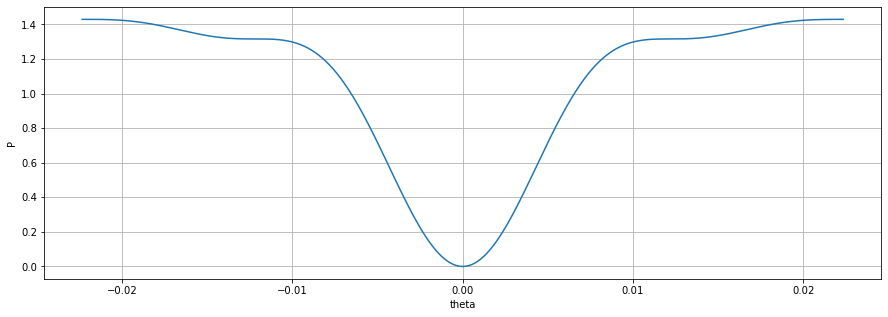

In [2]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt

d=1             #d particella
l_d=0.01        #lambda/d
ka =np.pi/l_d   #k*a = k*d/2
R=1             #distanza da detector
I_0=1           #intensità che arriva sul campione e viene scatterata
P_0=I_0*np.pi*(d/2)**2 *2 #potenza che arriva sul campione e viene scatterata

black1=np.arcsin(3.832/np.pi*l_d)  #zeri di bessel
black2=np.arcsin(7.016/np.pi*l_d)
black3=np.arcsin(10.173/np.pi*l_d)

def f(t):
    return ( sc.jv(1,ka*np.sin(t)) )**2 /abs(np.sin(t)) #disco di Airy da integrare

def Pdisc(t):
    return P_0*(1 - sc.jv(1,ka*np.sin(t)) **2 - sc.jv(0,ka*np.sin(t)) **2)

def shellpower(N,L,nbins,tlow,tup):
    theta0=np.linspace(tlow,tup, nbins)
    y=[]
    err=[]
    for th0 in theta0: #Monte Carlo integration with uniform pdf
        blk=[]
        for i in range(N):
            accum =0
            accum2=0
            for l in range(L):
                if th0-(tup-tlow)/nbins/2<0:
                    theta=np.random.uniform(0, th0+(tup-tlow)/nbins/2)
                    normaliz=th0+(tup-tlow)/nbins/2
                else:
                    theta=np.random.uniform(th0-(tup-tlow)/nbins/2, th0+(tup-tlow)/nbins/2)
                    normaliz=(tup-tlow)/nbins
                accum += f(theta)
            blk.append(I_0*2*np.pi* (2*R/ka)**2 * normaliz* accum/L)
            
        npblk=np.array(blk)
        y.append(np.mean(npblk)) #media delle medie dei blocchi
        err.append(np.sqrt( (np.mean(npblk**2)-y[-1]**2)/(N-1) ) ) #errore finale
    
    return theta0, y, err;

x=np.linspace(-np.arcsin(7.02/np.pi*l_d),np.arcsin(7.02/np.pi*l_d), 1000) #in zero mi da un warning ma no problem
y=[]
for t in x:
    y.append( Pdisc(t) )

plt.figure(figsize=(15,5))
plt.plot(x, y)
plt.xlabel('theta')
plt.ylabel('P')
#plt.title('a')
#plt.legend()
plt.grid(True)

'''
x,y,err=shellpower(20,1000, 100, 0, (black1+black2)/2) 
plt.figure(figsize=(15,5))
#plt.plot(x, y)
plt.errorbar(x, y, yerr=err, label='P(theta)')
plt.xlabel('theta')
plt.ylabel('Potenza')
#plt.title('a')
plt.legend()
plt.grid(True)
'''

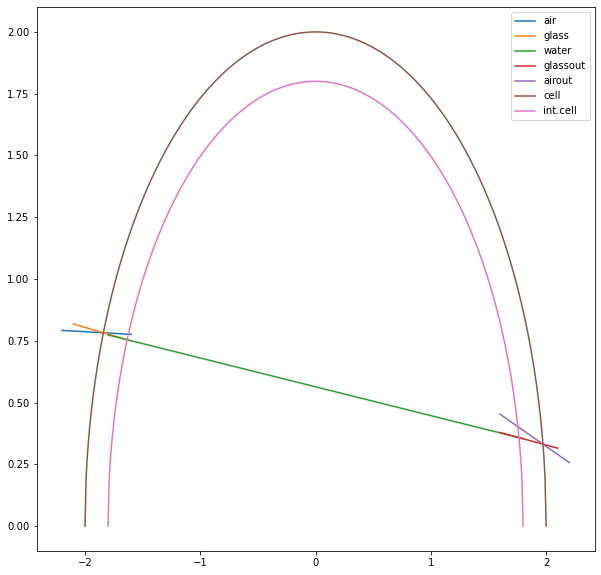

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Rotation_op_x(angle):
    return np.array([1,0,0],[0,np.cos(angle),-np.sin(angle)],[0,np.sin(angle),np.cos(angle)])

def Rotation_op_y(angle):
    return np.array([[np.cos(angle),0,np.sin(angle)],[0,1,0],[-np.sin(angle),0,np.cos(angle)]])

def Rotation_op_z(angle):
    return np.array([[np.cos(angle),-np.sin(angle),0],[np.sin(angle),np.cos(angle),0],[0,0,1]])

def exitline(P,Q,R,n1,n2,getin, versor=False):
    m= (P[1]-Q[1])/(P[0]-Q[0])
    a= m**2 +1
    b= 2*m *(Q[1]-m*Q[0])
    c= Q[1]**2 + (m*Q[0])**2 - 2*m*Q[1]*Q[0] - R**2
    
    sqrtdelta=np.sqrt(b**2 -4*a*c)
    if getin: x_c= (-b-sqrtdelta)/2/a
    else: x_c= (-b+sqrtdelta)/2/a
    C= np.array([x_c,  Q[1]+ m*(x_c-Q[0]),  Q[2]+ (P[2]-Q[2])/(P[0]-Q[0]) *(x_c-Q[0])])
    
#    print(C, P)
    alfa= C[1]*(C[2] - P[2]) #coefficienti piano
    beta= C[0]*(P[2] - C[2])
    gamma= C[1]*P[0] - C[0]*P[1]
    delta= -gamma*C[2]
    
#    print('gamma',gamma)
#    print('C0', C[0])
    
    a= 1+(C[1]/C[0])**2 + (C[1]/C[0] *beta/gamma -alfa/gamma)**2
    b=-2*delta/gamma**2 *(C[1]/C[0] *beta -alfa)
    c= (delta/gamma)**2 -1
    
    sqrtdelta=b**2 -4*a*c
    if getin: x_v= (-b-sqrtdelta)/2/a
    else: x_v= (-b+sqrtdelta)/2/a
    v_1= np.array([x_v, -C[1]/C[0] *x_v, (C[1]/C[0] *beta -alfa)/gamma *x_v])
    v_1= v_1/ np.linalg.norm(v_1)
    
    tz= np.pi/2 + np.arctan(C[1]/C[0])
    ty= -np.arcsin(v_1[2])
    
    v_in= P-C
#    print(P)
#    print('oooo',C)
    v_in= v_in /np.linalg.norm(v_in) #versori per snell
    v_perp= np.array([C[0], C[1], 0]) /R
    
#    print('ee', np.linalg.norm(v_perp))
#    print(v_in)
#    print(v_perp)
#    print(n1/n2 * np.linalg.norm(np.cross(v_in, v_perp)))
    theta_t=np.arcsin( n1/n2 * np.linalg.norm(np.cross(v_in, v_perp)) )
    
    if C[0]*C[1]<0: r_1=np.array([1, np.tan(-np.pi/2+theta_t), 0])
    else: r_1=np.array([-1, np.tan(-np.pi/2+theta_t), 0])
#    print(r_1, np.linalg.norm(r_1))
    r_1=r_1/np.linalg.norm(r_1)
    r_out= np.dot(Rotation_op_z(tz) , r_1)
    r_out= np.dot(Rotation_op_y(ty) , r_out)
    
    if versor:
        return C, C+r_out, r_out
    else: return C, C+r_out


#dimensioni utili
d=27.5
L=10
R_e=2
R_i=1.8
n_glass=1.4
n_air=1.003
n_wat=1.33
theta_det=0 #in gradi
P_lens= np.array([-L, 1, 1])
P_foc = np.array([d, 0, 0])


theta_det=theta_det *np.pi/180
V_det= np.array([np.cos(theta_det), np.sin(theta_det), 0])

ax=np.linspace(-2.2,-1.6,2)
mplt=(P_foc[1]-P_lens[1])/(P_foc[0]-P_lens[0])
qplt=P_lens[1]-mplt*P_lens[0]
ay=mplt*ax +qplt

p_new, q_new = exitline(P_lens, P_foc, R_e, n_air, n_glass, True)
gx=np.linspace(-2.1,-1.6,2)
mplt=(q_new[1]-p_new[1])/(q_new[0]-p_new[0])
qplt=p_new[1]-mplt*p_new[0]
gy=mplt*gx +qplt

p_new, q_new = exitline(p_new, q_new, R_i, n_glass, n_wat, True)
wx=np.linspace(-1.8,1.8,2)
mplt=(q_new[1]-p_new[1])/(q_new[0]-p_new[0])
qplt=p_new[1]-mplt*p_new[0]
wy=mplt*wx +qplt

p_new, q_new = exitline(p_new, q_new, R_i, n_wat, n_glass, False)
g2x=np.linspace(1.6,2.1,2)
mplt=(q_new[1]-p_new[1])/(q_new[0]-p_new[0])
qplt=p_new[1]-mplt*p_new[0]
g2y=mplt*g2x +qplt

p_new, q_new, V_out = exitline(p_new, q_new, R_e, n_glass, n_air, False, versor=True)
a2x=np.linspace(1.6,2.2,2)
mplt=(q_new[1]-p_new[1])/(q_new[0]-p_new[0])
qplt=p_new[1]-mplt*p_new[0]
a2y=mplt*a2x +qplt

plt.figure(figsize=(10,10))
plt.plot(ax,ay, label='air')
plt.plot(gx,gy, label='glass')
plt.plot(wx,wy, label='water')
plt.plot(g2x,g2y, label='glassout')
plt.plot(a2x,a2y, label='airout')
cylx=np.linspace(-R_e,R_e, 400)
plt.plot(cylx,np.sqrt(R_e**2 - cylx**2), label='cell')
cylintx=np.linspace(-R_i,R_i, 400)
plt.plot(cylintx,np.sqrt(R_i**2 - cylintx**2), label='int.cell')
plt.legend()
#plt.xlim(-1.8,-1.6)
#plt.ylim(0.6,0.8)
plt.show()


theta_init= np.cross((P_foc-P_lens)/np.linalg.norm(P_foc-P_lens),V_det)
theta_init= np.linalg.norm(theta_init)
theta_init= np.arcsin(theta_init)

theta_true= np.cross(V_out,V_det)
theta_true= np.linalg.norm(theta_true)
theta_true= np.arcsin(theta_true)
if np.linalg.norm(V_out - V_det)>np.linalg.norm(V_out + V_det): theta_true= np.pi - theta_true

#print(theta_init)
#print(theta_true)


0.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
1.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
2.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
3.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
4.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
5.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
6.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
7.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
8.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
9.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
10.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
11.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
12.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
13.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0 % 70.0 % 80.0 % 90.0 % 
14.0 10.0 % 20.0 % 30.0 % 40.0 % 50.0 % 60.0

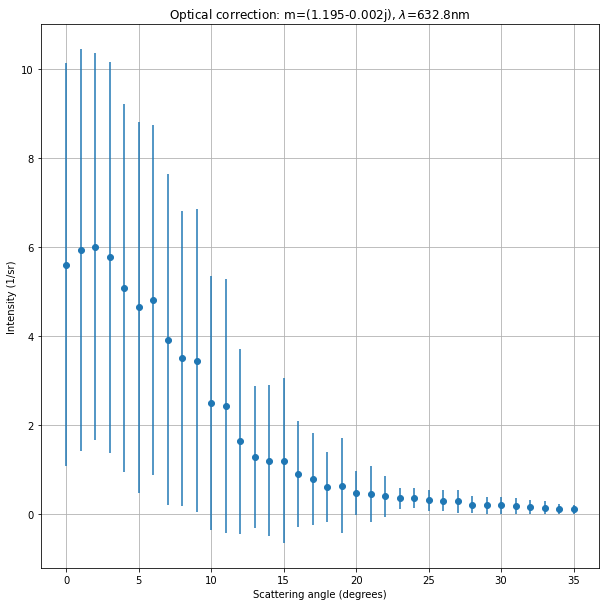

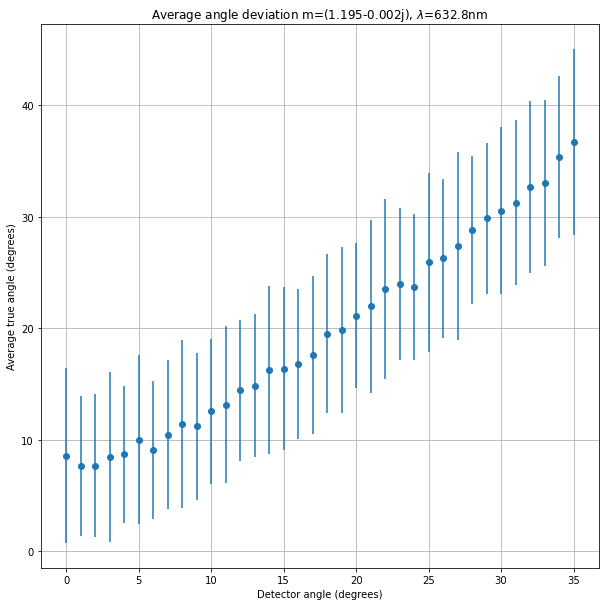

In [5]:
import numpy as np
import miepython as mp
k=27.5
L=10
R_e=2
R_i=1.8
n_glass=1.4
n_air=1.003
n_wat=1.33
theta_det=0 #in gradi
P_foc = np.array([k, 0, 0])
L_det=1

m = (1.59-0.003j)/n_wat #indice di rifrazione sfere/indice di rifrazione ambiente
#----WAVE AND PARTICLES-----
lambda0 = 632.8e-9 /n_wat  # [m]  lunghezza d'onda/indice rifraz ambiente
d = 2100e-9        # [m]  diametro sfera
x = 2*np.pi*d/2 /lambda0 #relative size parameter
#---------------------------
#P_tot=1*10**-4 #ptotale misurata DOPO SCATTERING
#---------------------------
#theta = np.linspace(0,180,500) #angolo theta rispetto a z asse incidente
#mu = np.cos(theta* np.pi/180)  #coseno dell'angolo

theta_det_spread=np.arctan(L_det/2/k)*2
theta_det=np.linspace(0,35,36)

angle_deviation=np.array([])
angle_err=np.array([])
I_true=np.array([])
I_err=np.array([])
N_mc=200
M_mc=200
for a in theta_det:
    print(a, end=' ')
    V_det= np.array([np.cos(a*np.pi/180), np.sin(a*np.pi/180), 0])
    itot=np.array([])
    angle_dev=np.array([])
  #  itot=0
  #  itot2=0
  #  angle_dev=0
  #  angle_dev2=0
    for i in range(1,N_mc+1):
        r=np.random.normal(0,0.5)
        phi=np.random.uniform(0,2*np.pi)
        P_lens= np.array([-L, r*np.cos(phi), r*np.sin(phi)])
        p_new, q_new = exitline(P_lens, P_foc, R_e, n_air, n_glass, True)
        p_new, q_new = exitline(p_new, q_new, R_i, n_glass, n_wat, True)
        p_new, q_new = exitline(p_new, q_new, R_i, n_wat, n_glass, False)
        p_new, q_new, V_out = exitline(p_new, q_new, R_e, n_glass, n_air, False, versor=True)

        theta_out= np.cross(V_out,V_det)
        theta_out= np.linalg.norm(theta_out)
        theta_out= np.arcsin(theta_out)
        if np.linalg.norm(V_out - V_det)>np.linalg.norm(V_out + V_det): theta_out= np.pi - theta_out

        angle_dev=np.append(angle_dev, theta_out)
  #      angle_dev+=theta_out
   #     angle_dev2+= theta_out**2
        
        for j in range(M_mc):
            th_eff=np.array([theta_out + np.random.uniform(-theta_det_spread, theta_det_spread)])
            i_inst=mp.i_per(m,x,np.cos(th_eff))[0]
            itot= np.append(itot, mp.i_per(m,x,np.cos(th_eff))[0])
         #   itot+= i_inst
         #   itot2+= i_inst **2
        
        if i%(N_mc/10)==0 and i!=N_mc: print(i/N_mc *100,'%', end=' ')
            
    angle_deviation= np.append(angle_deviation, np.mean(angle_dev) *180/np.pi)
    angle_err= np.append(angle_err, np.std(angle_dev) *180/np.pi)
    I_true=np.append(I_true, np.mean(itot))
    I_err =np.append(I_err , np.std(itot))
    print()
    del itot,angle_dev

np.savetxt('optcorrection2.dat', np.array([theta_det,I_true,I_err,angle_deviation,angle_err]),
           header='on rows: theta_det, I_true, I_err, angle_deviation, angle_err')


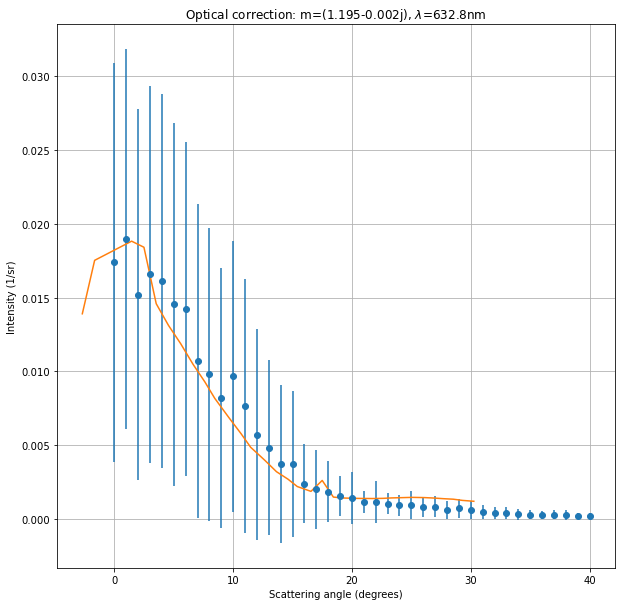

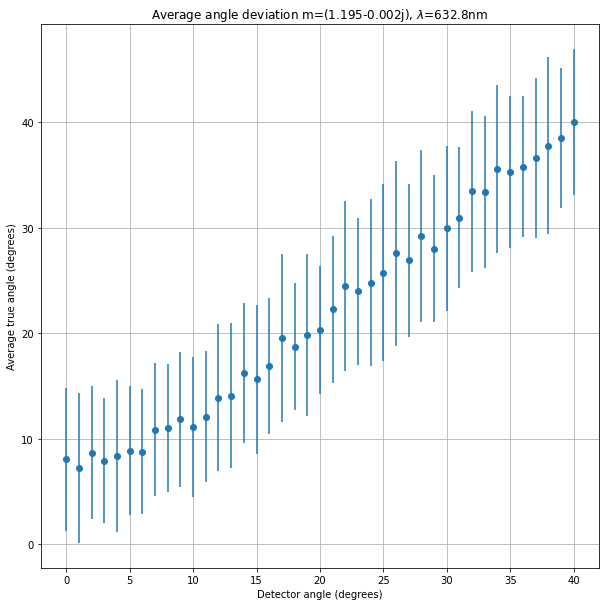

In [18]:
import numpy as np
import matplotlib.pyplot as plt
n_wat=1.33
m = (1.59-0.003j)/n_wat #indice di rifrazione sfere/indice di rifrazione ambiente
lambda0 = 632.8e-9 /n_wat  # [m]  lunghezza d'onda/indice rifraz ambiente

theta_det, I_true, I_err, angle_deviation, angle_err= np.loadtxt('optcorrection.dat')
h=np.array([3.9,4.4,5.9,6.4,6.9,7.4,7.9,8.4,8.9,9.3,9.9,10.4,10.8,11.4,11.9,12.4,12.8,13.4,13.9,14.4,14.9,15.5,16.2,16.7,17.1,17.6,18.1,18.7,19.2,19.7,20.2,20.7,21.3])
Int=np.array([18.03,22.6,23.8,23.1,18.15,16.18,14.51,12.7,11.1,9.71,8.02,6.69,5.58,4.5,3.58,2.97,2.40,2.01,2.76,1.55,1.46,1.41,1.37,1.36,1.37,1.365,1.36,1.32,1.27,1.21,1.16,1.07,1])*10**-6 / (1/(27.5**2+h**2))
h=np.arctan((h-5.2)/27.6) *180/np.pi

plt.figure(figsize=(10,10))
plt.errorbar(theta_det, I_true *3*10**-3, yerr=I_err *3*10**-3, fmt='o')
plt.plot(h,Int)
plt.title('Optical correction: m='+str(round(m.real, 3) + round(m.imag, 3) * 1j)+', $\lambda$='+str(round(lambda0*n_wat*10**9, 1))+'nm')
plt.xlabel("Scattering angle (degrees)")
plt.ylabel("Intensity (1/sr)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,10))
plt.errorbar(theta_det, angle_deviation, yerr=angle_err, fmt='o')
plt.title('Average angle deviation m='+str(round(m.real, 3) + round(m.imag, 3) * 1j)+', $\lambda$='+str(round(lambda0*n_wat*10**9, 1))+'nm')
plt.xlabel("Detector angle (degrees)")
plt.ylabel("Average true angle (degrees)")
plt.grid(True)
plt.show()